In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path='/content/drive/MyDrive/Shot_dataset.zip'
extract_path='/content/shot_data'

with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height,img_width=224,224
batch_size=32

datagen=ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator=datagen.flow_from_directory(
    '/content/shot_data/data',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator=datagen.flow_from_directory(
    '/content/shot_data/data',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 3779 images belonging to 4 classes.
Found 944 images belonging to 4 classes.


# Model building

### feature extraction by using MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(224,224,3))
base_model.tranable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 106s 476ms/step - accuracy: 0.7553 - loss: 0.6032 - val_accuracy: 0.2775 - val_loss: 12.3362
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.9264 - loss: 0.2287 - val_accuracy: 0.3104 - val_loss: 14.0636
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.9679 - loss: 0.0955 - val_accuracy: 0.4619 - val_loss: 6.8563
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.9320 - loss: 0.2157 - val_accuracy: 0.3316 - val_loss: 16.0693
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 260ms/step - accuracy: 0.9720 - loss: 0.0704 - val_accuracy: 0.3824 - val_loss: 11.8716
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 261ms/step - accuracy: 0.9660 - loss: 0.1084 - val_accuracy: 0.4703 - val_loss: 7.6076
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 270ms/step - accuracy: 0.9859 - loss: 0.0425 - val_accuracy: 0.4587 - val_loss: 12.6184
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - accuracy: 0.9849 - l

In [ ]:
history=model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=10,
    epochs=25
)

Epoch 11/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 301ms/step - accuracy: 0.9839 - loss: 0.0480 - val_accuracy: 0.6589 - val_loss: 3.9008
Epoch 12/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.2669 - val_loss: 25.9396
Epoch 13/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 313ms/step - accuracy: 0.9779 - loss: 0.0717 - val_accuracy: 0.5710 - val_loss: 7.5979
Epoch 14/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step - accuracy: 0.9930 - loss: 0.0238 - val_accuracy: 0.3570 - val_loss: 14.7091
Epoch 15/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - accuracy: 0.9813 - loss: 0.0550 - val_accuracy: 0.6070 - val_loss: 6.4356
Epoch 16/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.9541 - loss: 0.1556 - val_accuracy: 0.5254 - val_loss: 3.4044
Epoch 17/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.9922 - loss: 0.0278 - val_accuracy: 0.6854 - val_loss: 1.9501
Epoch 18/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.9978

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab_Models/best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=35,                  # Allow up to 35
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 266ms/step - accuracy: 0.9838 - loss: 0.0537 - val_accuracy: 0.4428 - val_loss: 8.1786
Epoch 2/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 255ms/step - accuracy: 0.9553 - loss: 0.1513 - val_accuracy: 0.2701 - val_loss: 15.5500
Epoch 3/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.9849 - loss: 0.0465 - val_accuracy: 0.4788 - val_loss: 8.7931
Epoch 4/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - accuracy: 0.9569 - loss: 0.1450 - val_accuracy: 0.5222 - val_loss: 6.5762
Epoch 5/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.5593 - val_loss: 4.1059
Epoch 6/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.9966 - loss: 0.0145 - val_accuracy: 0.7362 - val_loss: 2.3619
Epoch 7/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.9975 - loss: 0.0119 - val_accuracy: 0.5837 - val_loss: 5.8731
Epoch 8/35
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - accuracy: 0.9943 - loss: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Predict on validation set
val_generator.reset()  # Important: Reset the generator
predictions = model.predict(val_generator, verbose=1)

# Get predicted class indices
y_pred = np.argmax(predictions, axis=1)

# Get true class indices
y_true = val_generator.classes


30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 490ms/step


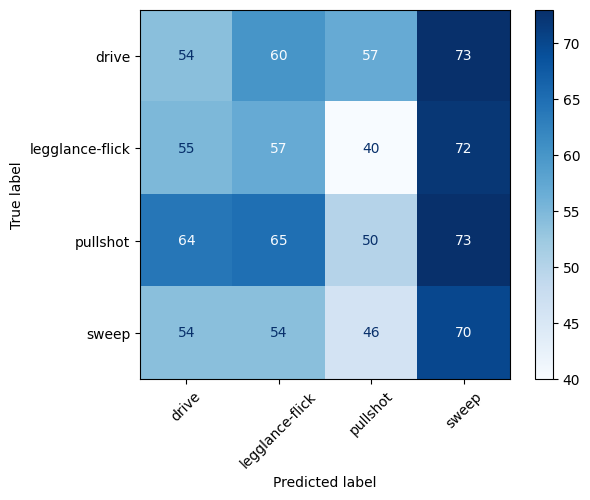

In [ ]:
# Get class labels (optional: for nicer display)
class_labels = list(val_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 1. Unfreeze last few layers
base_model.trainable = True

# Optionally: Freeze first few layers, train only last 50-100 layers
for layer in base_model.layers[:-100]:
    layer.trainable = False

# 2. Compile with lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Tiny learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Train again
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 399ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.8633 - val_loss: 0.9920
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 54s 260ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.8750 - val_loss: 0.8896
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.9995 - loss: 0.0036 - val_accuracy: 0.8814 - val_loss: 0.8301
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 299ms/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.8856 - val_loss: 0.7701
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.8909 - val_loss: 0.7155
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.8909 - val_loss: 0.6625
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.9985 - loss: 0.0081 - val_accuracy: 0.8951 - val_loss: 0.6056
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.9998 - loss: 0

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step


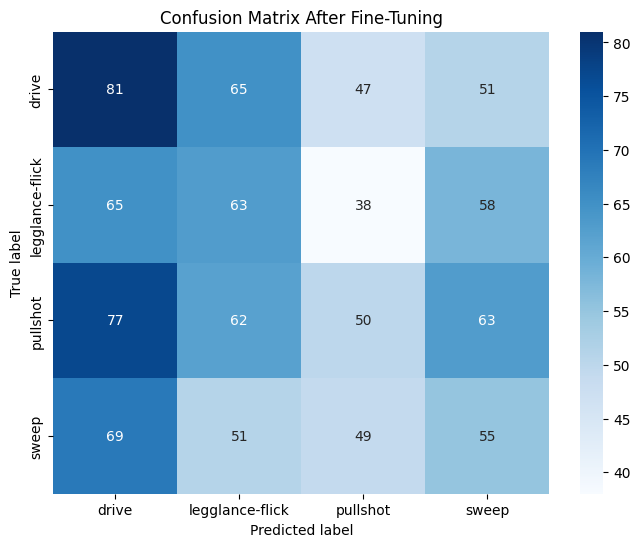

In [ ]:
import seaborn as sns
# 1. Get predictions on validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# 2. Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 3. Plot it
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix After Fine-Tuning')
plt.show()
